In [136]:
from plotting.plot_utils import get_logtable, set_rc_params
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
set_rc_params()

# Extract Data From Before Growing

In [137]:
databse_name = "fehring_growing_nn"
table_name = "blackbox_incumbent_gen"

In [138]:
smac_costs = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 11:03:01,486  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 11:03:01,487  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 11:03:01,487  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 11:03:01,487  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 11:03:01,488  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 11:03:01,488  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 11:03:01,488  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 11:03:01,488  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 11:03:01,488  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 11:03:01,489  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 11:03:01,493  | py-experimenter - WARNING  | No codecarbon section defined in config
2024-08-22 11:03:01,494  | py-experimenter - INFO     | 0 keys loaded from agent
2024-08-22 11:03:01,561  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 11:03:01,710  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 11:03:01,797  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 11:03:01,799  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 11:03:01,801  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 11:03:01,802  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2

In [139]:
# Select Row with Minimal Cost
grow_once_cost = smac_costs[smac_costs["experiment_id"] == 1]
grow_once_minimal_cost_row = smac_costs.loc[smac_costs["cost"].idxmin()]
minimal_cost_experiment_id = grow_once_minimal_cost_row["experiment_id"]
minimal_cost_trial = grow_once_minimal_cost_row["trial_number"] - 1
minimal_cost = grow_once_minimal_cost_row["cost"]

In [140]:
# Get Training Process Logtable
training_process_logtable = "training_process"
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 11:03:02,075  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 11:03:02,076  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 11:03:02,076  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 11:03:02,076  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 11:03:02,077  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 11:03:02,077  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 11:03:02,077  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 11:03:02,077  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 11:03:02,077  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 11:03:02,078  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

In [141]:
# Select entries 
relevat_training_process_before_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
relevat_training_process_before_growth

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,evaluated_cost,evaluated_stdev
8800,8801,3,2024-07-10 23:25:26,2,38,None,50000,-0.979,0.979790
8801,8802,3,2024-07-10 23:25:26,2,38,None,100000,-0.593,0.905837
8802,8803,3,2024-07-10 23:25:26,2,38,None,150000,-0.694,1.092930
8803,8804,3,2024-07-10 23:25:26,2,38,None,200000,-0.196,0.972494
8804,8805,3,2024-07-10 23:25:26,2,38,None,250000,-0.493,1.014610
...,...,...,...,...,...,...,...,...,...
8895,8896,3,2024-07-10 23:29:45,4,38,None,800000,0.900,0.300000
8896,8897,3,2024-07-10 23:29:45,4,38,None,850000,0.900,0.300000
8897,8898,3,2024-07-10 23:29:45,4,38,None,900000,1.000,0.000000
8898,8899,3,2024-07-10 23:29:45,4,38,None,950000,0.800,0.400000


<Axes: xlabel='timestep', ylabel='evaluated_cost'>

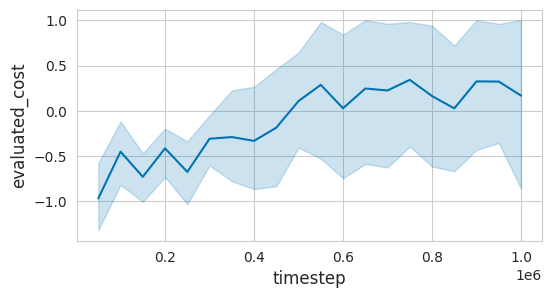

In [142]:
# SNS plot training proccess. "timestep" on x, "evalauted_cost on y"
sns.lineplot(data=relevat_training_process_before_growth, x="timestep", y="evaluated_cost")

In [143]:
last_time_step_data = relevat_training_process_before_growth[relevat_training_process_before_growth["timestep"] == relevat_training_process_before_growth["timestep"].max()]
last_time_step_data

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,evaluated_cost,evaluated_stdev
8819,8820,3,2024-07-10 23:25:28,2,38,None,1000000,-0.595,0.908969
8839,8840,3,2024-07-10 23:26:23,1,38,None,1000000,-1.565,0.783163
8859,8860,3,2024-07-10 23:27:59,0,38,None,1000000,1.000,0.000000
8879,8880,3,2024-07-10 23:28:20,3,38,None,1000000,1.000,0.000000
8899,8900,3,2024-07-10 23:29:45,4,38,None,1000000,1.000,0.000000


# Add Grow Once Data

In [144]:
table_name = "net2deeper_grow_once"

In [145]:
grow_once_cost = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")
smac_grow_once_costs = grow_once_cost[grow_once_cost["experiment_id"] == 4]


2024-08-22 11:03:02,878  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 11:03:02,878  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 11:03:02,878  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 11:03:02,878  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 11:03:02,879  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 11:03:02,879  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 11:03:02,879  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 11:03:02,879  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 11:03:02,879  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 11:03:02,880  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 11:03:02,950  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 11:03:03,099  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 11:03:03,188  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 11:03:03,189  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 11:03:03,190  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 11:03:03,191  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 11:03:03,192  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 11:03:03,193  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [146]:
# select row with minimal cost
grow_once_minimal_cost_row = grow_once_cost.loc[smac_grow_once_costs["cost"].idxmin()]
minimal_cost_experiment_id = grow_once_minimal_cost_row["experiment_id"]
minimal_cost_trial = grow_once_minimal_cost_row["trial_number"] -1 
minimal_cost = grow_once_minimal_cost_row["cost"]


In [147]:
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 11:03:03,444  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 11:03:03,445  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 11:03:03,445  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 11:03:03,445  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 11:03:03,445  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 11:03:03,445  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 11:03:03,445  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 11:03:03,446  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 11:03:03,446  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 11:03:03,446  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 11:03:03,516  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 11:03:03,662  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 11:03:03,749  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 11:03:03,750  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 11:03:03,751  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 11:03:03,752  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 11:03:03,753  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 11:03:03,754  | py-experimenter - WARNING  | Tunnels are not started. Please .s

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

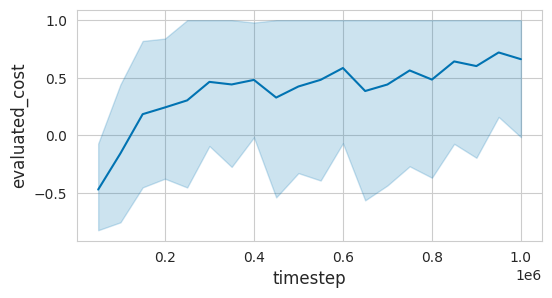

In [148]:
# Plot training process after growth
relevat_training_process_after_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
sns.lineplot(data=relevat_training_process_after_growth, x="timestep", y="evaluated_cost")

2024-08-22 11:03:04,164  | py.warnings - WARNING  | /tmp/ipykernel_350956/3380021130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-08-22 11:03:04,164  | py.warnings - WARNING  | /tmp/ipykernel_350956/3380021130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-08-22 11:03

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

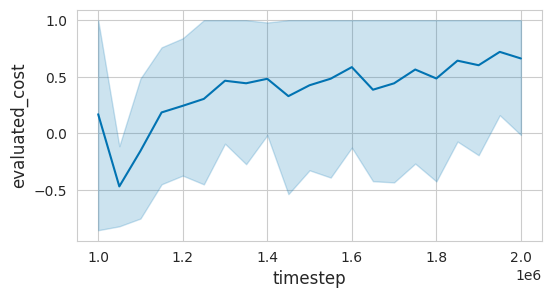

In [149]:
# Plot Combination of Before and After Growth, first concat the dataframes, and increase the timestep of the second dataframe by the maximum timestep of the first dataframe
relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()
combined_growed = pd.concat([last_time_step_data, relevat_training_process_after_growth])
sns.lineplot(data=combined_growed, x="timestep", y="evaluated_cost")

# Add Baseline for 1 Layer at all times

In [150]:
table_name = "hpo_warmstart"

In [151]:
warmstarting_table = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")
smac_cost_warmstarting = warmstarting_table[warmstarting_table["experiment_id"] == 8]

2024-08-22 11:03:04,384  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 11:03:04,384  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 11:03:04,384  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 11:03:04,385  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 11:03:04,385  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 11:03:04,385  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 11:03:04,385  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 11:03:04,385  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 11:03:04,385  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 11:03:04,385  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 11:03:04,456  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 11:03:04,602  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 11:03:04,691  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 11:03:04,692  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 11:03:04,693  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 11:03:04,695  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 11:03:04,696  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 11:03:04,697  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [152]:
samc_cost_warmstarting_row = smac_cost_warmstarting.loc[smac_cost_warmstarting["cost"].idxmin()]
minimal_cost_trial = samc_cost_warmstarting_row["trial_number"] -1
minimal_cost = samc_cost_warmstarting_row["cost"]

In [153]:
samc_cost_warmstarting_row

ID                                                                             152
experiment_id                                                                    8
timestamp                                                      2024-07-17 21:36:14
trial_number                                                                    36
budget                                                                        None
hyperparameter_str_identifier    {'batch_size': 128, 'ent_coef': 3.035832575602...
cost                                                                       -0.8006
Name: 85, dtype: object

In [154]:
training_process_after_warmstarting = get_logtable(databse_name, table_name, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 11:03:04,965  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 11:03:04,965  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 11:03:04,966  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 11:03:04,966  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 11:03:04,966  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 11:03:04,966  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 11:03:04,967  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 11:03:04,967  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 11:03:04,967  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 11:03:04,967  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

In [155]:
training_process_after_warmstarting[(training_process_after_warmstarting["experiment_id"] == 8) & (training_process_after_warmstarting["trial_number"] == minimal_cost_trial)]

,ID,experiment_id,timestamp,worker_id,trial_number,budget,hyperparameter_str_identifier,timestep,evaluated_cost,evaluated_stdev
8500,15181,8,2024-07-17 21:28:32,2,35,1000000,None,50000,-1.288,1.092500
8501,15182,8,2024-07-17 21:28:33,2,35,1000000,None,100000,-0.678,1.074520
8502,15183,8,2024-07-17 21:28:33,2,35,1000000,None,150000,-0.492,1.013050
8503,15184,8,2024-07-17 21:28:33,2,35,1000000,None,200000,-0.994,0.994054
8504,15185,8,2024-07-17 21:28:33,2,35,1000000,None,250000,-0.789,0.966400
...,...,...,...,...,...,...,...,...,...,...
8595,15276,8,2024-07-17 21:36:12,4,35,1000000,None,800000,1.000,0.000000
8596,15277,8,2024-07-17 21:36:12,4,35,1000000,None,850000,1.000,0.000000
8597,15278,8,2024-07-17 21:36:12,4,35,1000000,None,900000,1.000,0.000000
8598,15279,8,2024-07-17 21:36:12,4,35,1000000,None,950000,1.000,0.000000


<Axes: xlabel='timestep', ylabel='evaluated_cost'>

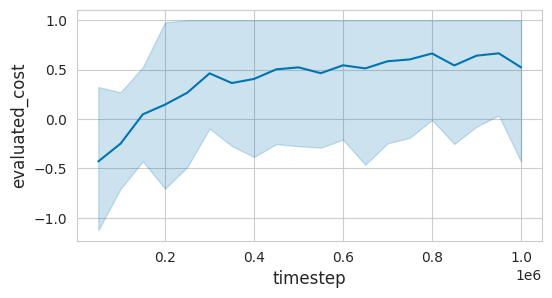

In [156]:
# Plot training process after warmstarting
training_process_after_warmstarting = training_process_after_warmstarting[(training_process_after_warmstarting["experiment_id"] == 8) & (training_process_after_warmstarting["trial_number"] == minimal_cost_trial)]
sns.lineplot(data=training_process_after_warmstarting, x="timestep", y="evaluated_cost")

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

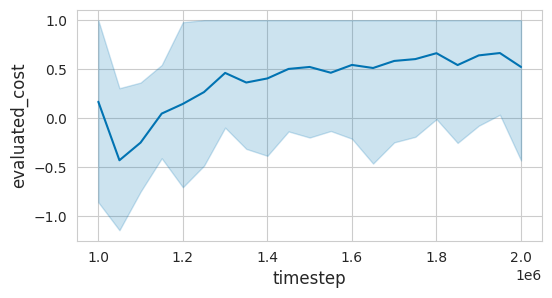

In [157]:
# Plot Combination of Before and After Growth, first concat the dataframes, and increase the timestep of the second dataframe by the maximum timestep of the first dataframe
training_process_after_warmstarting["timestep"] += training_process_after_warmstarting["timestep"].max()
combined_warmstarted = pd.concat([last_time_step_data, training_process_after_warmstarting])
sns.lineplot(data=combined_warmstarted, x="timestep", y="evaluated_cost")

# Add Basleine For two Layers at all time

In [158]:
table_name_2_layer_initial = 'incumbent_gen_2_layers'
table_name_2_layer_warmstarting = 'hpo_warmstart_2_layers'

In [159]:
# Get SMAC Tables
smac_table_2_layer_initial = get_logtable(databse_name, table_name_2_layer_initial, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")
smac_table_2_layer_warmstarting = get_logtable(databse_name, table_name_2_layer_warmstarting, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 11:03:05,952  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 11:03:05,952  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 11:03:05,952  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 11:03:05,953  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 11:03:05,953  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 11:03:05,953  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 11:03:05,953  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 11:03:05,953  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 11:03:05,954  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 11:03:05,954  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 11:03:06,025  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 11:03:06,177  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 11:03:06,265  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 11:03:06,266  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 11:03:06,266  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 11:03:06,266  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 11:03:06,266  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 11:03:06,267  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [160]:
# Select incumbents
smac_table_2_layer_initial_relervant = smac_table_2_layer_initial[smac_table_2_layer_initial["experiment_id"] == 2]
smac_table_2_layer_warmstarting_relervant = smac_table_2_layer_warmstarting[smac_table_2_layer_warmstarting["experiment_id"] == 2]


In [161]:
smac_table_2_layer_initial_relervant

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,cost
0,43,2,2024-07-17 09:47:49,1,None,"{'batch_size': 64, 'ent_coef': 0.1861694086343...",1.0756
1,44,2,2024-07-17 09:58:55,2,None,"{'batch_size': 256, 'ent_coef': 0.074653743579...",1.3132
2,45,2,2024-07-17 10:12:03,3,None,"{'batch_size': 128, 'ent_coef': 0.244189932290...",1.2116
3,46,2,2024-07-17 10:48:06,4,None,"{'batch_size': 32, 'ent_coef': 0.1324634098447...",1.7736
4,47,2,2024-07-17 11:28:20,5,None,"{'batch_size': 32, 'ent_coef': 0.2976173403672...",1.7040
5,48,2,2024-07-17 11:40:15,6,None,"{'batch_size': 128, 'ent_coef': 0.108538198750...",1.1390
6,49,2,2024-07-17 11:51:56,7,None,"{'batch_size': 256, 'ent_coef': 0.210107968188...",1.9080
7,50,2,2024-07-17 12:04:13,8,None,"{'batch_size': 64, 'ent_coef': 0.0212574223056...",0.8120
8,51,2,2024-07-17 12:19:04,9,None,"{'batch_size': 64, 'ent_coef': 0.2432073301635...",1.6744
9,52,2,2024-07-17 12:32:59,10,None,"{'batch_size': 256, 'ent_coef': 0.129933852609...",0.7080


In [162]:
smac_table_2_layer_initial_minimal_cost_row = smac_table_2_layer_initial_relervant.loc[smac_table_2_layer_initial_relervant["cost"].idxmin()]
smac_table_2_layer_warmstarting_minimal_cost_row = smac_table_2_layer_warmstarting_relervant.loc[smac_table_2_layer_warmstarting_relervant["cost"].idxmin()]

incumbent_trial_number_2_layer_initial = smac_table_2_layer_initial_minimal_cost_row["trial_number"] - 1
incumbent_trial_number_2_layer_warmstarting = smac_table_2_layer_warmstarting_minimal_cost_row["trial_number"] - 1

In [163]:
# Extract Training process tables
training_process_2_layer_initial = get_logtable(databse_name, table_name_2_layer_initial, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")
training_process_2_layer_warmstarting = get_logtable(databse_name, table_name_2_layer_warmstarting, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 11:03:07,105  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 11:03:07,106  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 11:03:07,106  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 11:03:07,106  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 11:03:07,106  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 11:03:07,106  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 11:03:07,106  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 11:03:07,107  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 11:03:07,107  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 11:03:07,107  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 11:03:07,178  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 11:03:07,328  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 11:03:07,413  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 11:03:07,414  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 11:03:07,416  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 11:03:07,417  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 11:03:07,418  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 11:03:07,419  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [164]:
# Extract relevant training process
training_process_2_layer_initial_relevant = training_process_2_layer_initial[(training_process_2_layer_initial["experiment_id"] == 2) & (training_process_2_layer_initial["trial_number"] == incumbent_trial_number_2_layer_initial)]
training_process_2_layer_warmstarting_relevant = training_process_2_layer_warmstarting[(training_process_2_layer_warmstarting["experiment_id"] == 2) & (training_process_2_layer_warmstarting["trial_number"] == incumbent_trial_number_2_layer_warmstarting)]

# Combine the two dataframes
training_process_2_layer_warmstarting_relevant["timestep"] += training_process_2_layer_initial_relevant["timestep"].max()
combined_2_layer = pd.concat([training_process_2_layer_initial_relevant, training_process_2_layer_warmstarting_relevant])

2024-08-22 11:03:08,124  | py.warnings - WARNING  | /tmp/ipykernel_350956/3498104734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_process_2_layer_warmstarting_relevant["timestep"] += training_process_2_layer_initial_relevant["timestep"].max()

2024-08-22 11:03:08,124  | py.warnings - WARNING  | /tmp/ipykernel_350956/3498104734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_process_2_layer_warmstarting_relevant["timestep"] += training_process_2_layer_initial_relevant["timestep"]

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

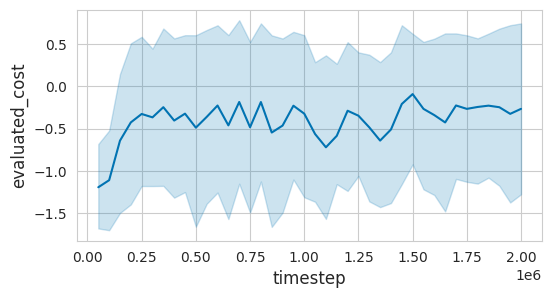

In [165]:
# Plot the combined dataframes
sns.lineplot(data=combined_2_layer, x="timestep", y="evaluated_cost")

# Compare Warmstarting and Growth

In [166]:
from utils.plotting import training_process_style

<Figure size 600x300 with 0 Axes>

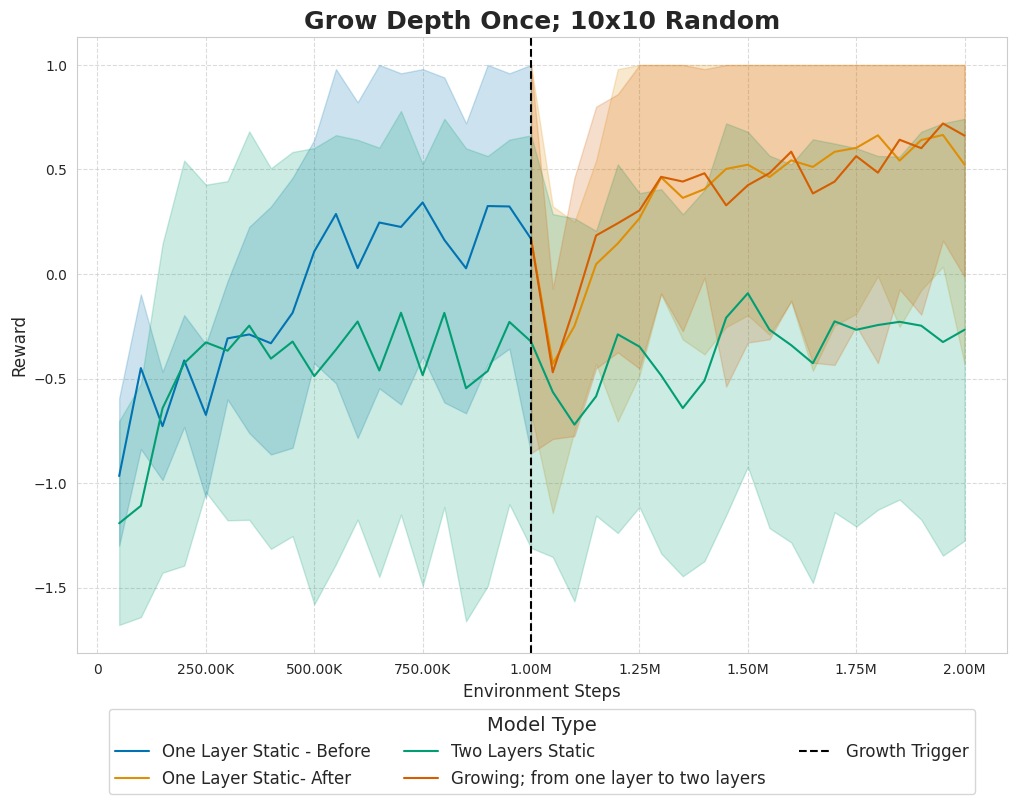

In [167]:
training_process_style()
sns.lineplot(data=relevat_training_process_before_growth, x="timestep", y="evaluated_cost", label="One Layer Static - Before")
sns.lineplot(data=combined_warmstarted, x="timestep", y="evaluated_cost", label="One Layer Static- After")
sns.lineplot(data=combined_2_layer, x="timestep", y="evaluated_cost", label="Two Layers Static")
sns.lineplot(data=combined_growed, x="timestep", y="evaluated_cost", label="Growing; from one layer to two layers")
plt.axvline(x=1000000, color="black", linestyle="--", label = "Growth Trigger")
plt.xlabel("Environment Steps")
plt.ylabel("Reward")
plt.legend(title="Model Type", fontsize=12, title_fontsize=14, loc="center", bbox_to_anchor=(0.5, -0.16), ncol=3)
plt.grid(True, linestyle="--", alpha=0.7)
plt.title("Grow Depth Once; 10x10 Random", fontsize=18, fontweight="bold")
plt.savefig("plotting/minihack/grow_depth_once/grow_once_10x10_random.png", bbox_inches="tight")